In [ ]:
"""decision tree: is an arrangement of the data tree structure, where at each node seperated to different branches
based on features of the dataset. branches represent decision rules n each leaf node represent the outcome.
is the arrangement of the data in tree structure where multuple decision boundries or hyperplain based on multiple fearture
in order to classfied the data without having impurities

formula for breaking and creating boundries creating a feture: gini index= 1-Psq2-qsq2
                                                                entropy= -plogp-qlogq

all the data tring to spliting the nodes are splitated into branches and are called decision node, which are feather broken till we get 
the leaf nodes which has less impurities.
thw metricts evaluate the qaulity of entripy n information gain are the metrics to evaluate the qaulity of the slate entropy major randamness or impurity in a dataset where as information
gain major the reduction in entropy after dataset is split on an attribute 

gini impurity is a another matrics to evaluate the qaulity of a split majoring the impurity of a dataset.

"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["Class"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df["Class"].value_counts()

Class
0    50
1    50
2    50
Name: count, dtype: int64

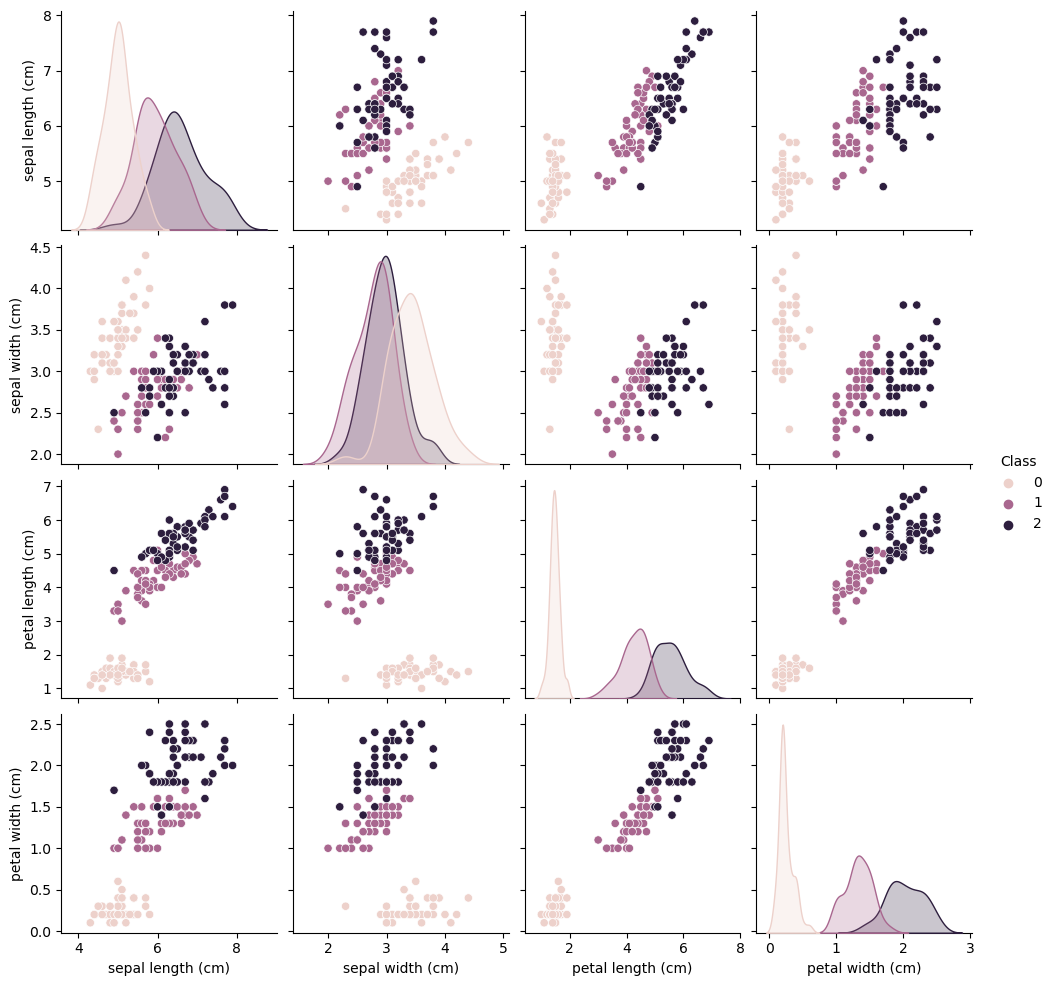

In [11]:
sns.pairplot(data=df,hue="Class")

In [12]:
feature=df.iloc[:,:-1]
target=df.iloc[:,-1]


In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(feature,target,random_state=1,test_size=0.3)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    tr=model.score(xtrain,ytrain)
    te=model.score(xtest,ytest)
    print(f"trainig score{tr}\nTesting score {te}")
    cr=classification_report(ytest,ypred)
    print(f"classification_report:\n{cr}")
    cm=confusion_matrix(ytest,ypred)
    print(f"confusion_matrix:\n{cm}")

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
mymodel(DecisionTreeClassifier())

trainig score1.0
Testing score 0.9555555555555556
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

confusion_matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [23]:
from sklearn.linear_model import LogisticRegression
mymodel(LogisticRegression(multi_class='multinomial'))

trainig score0.9809523809523809
Testing score 0.9777777777777777
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

confusion_matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [ ]:
"""pruinig techniqe : employed to deal with overfitting by removing the subnotes of decison node which dosenot add
any addtional info, helps in controlling th size of the tree  """

In [24]:
parameters={
    "criterion":["gini","entropy"],
    "max_depth":list(range(2,10)),
    "min_samples_leaf":list(range(2,15))
}

In [25]:
from sklearn.model_selection import GridSearchCV
model=GridSearchCV(DecisionTreeClassifier(),
                  parameters,verbose=2)
model.fit(xtrain,ytrain)

Fitting 5 folds for each of 208 candidates, totalling 1040 fits
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min

[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_leaf=14; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=8; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END .criterion=entropy, max_depth=8, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14]},
             verbose=2)

In [26]:
model.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [27]:
mymodel(model.best_estimator_)

trainig score0.9809523809523809
Testing score 0.9555555555555556
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

confusion_matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [ ]:
from sklean import tree
